## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [8]:
import os
import keras

import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-1, 1e-2, 1e-4, 1e-8]
L1_EXP = [1e-1, 1e-2, 1e-4, 1e-8]

In [14]:
 
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
results = {}
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with L1 = 0.100000, L2 = 0.100000


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the s

50000/50000 [==============================] - 3s 50us/step - loss: 18.0484 - acc: 0.0966 - val_loss: 18.0050 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 3s 51us/step - loss: 18.0484 - acc: 0.0987 - val_loss: 18.0514 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 3s 51us/step - loss: 18.0486 - acc: 0.0973 - val_loss: 18.1099 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 3s 50us/step - loss: 18.0489 - acc: 0.0980 - val_loss: 17.8496 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 3s 50us/step - loss: 18.0477 - acc: 0.0979 - val_loss: 18.1298 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 3s 50us/step - loss: 18.0488 - acc: 0.0983 - val_loss: 18.0572 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 2s 50us/step - loss: 18.0488 - acc: 0.0983 - val_loss: 17.9926 - val_acc: 0.1000
Epoch 34/50
50000/50000 [=======

Epoch 28/50
50000/50000 [==============================] - 3s 50us/step - loss: 18.2689 - acc: 0.0969 - val_loss: 18.1872 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 3s 51us/step - loss: 18.2670 - acc: 0.0986 - val_loss: 18.1957 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 3s 51us/step - loss: 18.2646 - acc: 0.1000 - val_loss: 18.1334 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 3s 51us/step - loss: 18.2611 - acc: 0.0988 - val_loss: 18.2468 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 3s 51us/step - loss: 18.2602 - acc: 0.0982 - val_loss: 18.1271 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 3s 52us/step - loss: 18.2574 - acc: 0.0992 - val_loss: 18.2622 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 51us/step - loss: 18.2552 - acc: 0.0991 - val_loss: 18.0470 - val_acc: 0.1000
Epoch 35/50
50000/50

50000/50000 [==============================] - 3s 51us/step - loss: 18.3371 - acc: 0.0994 - val_loss: 18.2137 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 3s 50us/step - loss: 18.3366 - acc: 0.1000 - val_loss: 18.2220 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 2s 50us/step - loss: 18.3368 - acc: 0.0981 - val_loss: 18.1684 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 2s 50us/step - loss: 18.3364 - acc: 0.0970 - val_loss: 18.3083 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 2s 50us/step - loss: 18.3373 - acc: 0.0971 - val_loss: 18.1206 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 3s 51us/step - loss: 18.3360 - acc: 0.0998 - val_loss: 18.2794 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 50us/step - loss: 18.3359 - acc: 0.0965 - val_loss: 18.0808 - val_acc: 0.1000
Epoch 35/50
50000/50000 [=======

Epoch 29/50
50000/50000 [==============================] - 3s 51us/step - loss: 18.3376 - acc: 0.0987 - val_loss: 18.2096 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 3s 52us/step - loss: 18.3378 - acc: 0.0994 - val_loss: 18.1507 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 3s 52us/step - loss: 18.3375 - acc: 0.0955 - val_loss: 18.2951 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 3s 54us/step - loss: 18.3384 - acc: 0.0959 - val_loss: 18.1132 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 3s 52us/step - loss: 18.3374 - acc: 0.0969 - val_loss: 18.2620 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 50us/step - loss: 18.3370 - acc: 0.0968 - val_loss: 18.0702 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 3s 51us/step - loss: 18.3370 - acc: 0.0987 - val_loss: 18.2310 - val_acc: 0.1000
Epoch 36/50
50000/50

50000/50000 [==============================] - 3s 51us/step - loss: 2.4600 - acc: 0.0976 - val_loss: 2.4600 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.4600 - acc: 0.0995 - val_loss: 2.4599 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.4600 - acc: 0.0977 - val_loss: 2.4599 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.4600 - acc: 0.0963 - val_loss: 2.4600 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.4600 - acc: 0.0971 - val_loss: 2.4599 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.4600 - acc: 0.0980 - val_loss: 2.4600 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.4600 - acc: 0.0977 - val_loss: 2.4600 - val_acc: 0.1000
Epoch 37/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 2.4618 - acc: 0.0986 - val_loss: 2.4616 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4618 - acc: 0.0979 - val_loss: 2.4617 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.4618 - acc: 0.0968 - val_loss: 2.4617 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4617 - acc: 0.0989 - val_loss: 2.4616 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4617 - acc: 0.0978 - val_loss: 2.4617 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.4617 - acc: 0.0988 - val_loss: 2.4618 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4617 - acc: 0.0984 - val_loss: 2.4615 - val_acc: 0.1000
Epoch 38/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0993 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0976 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0969 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0977 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0986 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0963 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 39/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0952 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.4626 - acc: 0.0978 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.4626 - acc: 0.0969 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.4626 - acc: 0.0978 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0971 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 40/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 51us/step - loss: 2.1685 - acc: 0.1916 - val_loss: 2.1654 - val_acc: 0.1929
Epoch 35/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.1673 - acc: 0.1912 - val_loss: 2.1645 - val_acc: 0.1925
Epoch 36/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.1665 - acc: 0.1931 - val_loss: 2.1666 - val_acc: 0.1930
Epoch 37/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.1657 - acc: 0.1906 - val_loss: 2.1629 - val_acc: 0.1934
Epoch 38/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.1647 - acc: 0.1917 - val_loss: 2.1622 - val_acc: 0.1892
Epoch 39/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.1644 - acc: 0.1905 - val_loss: 2.1619 - val_acc: 0.1937
Epoch 40/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.1633 - acc: 0.1910 - val_loss: 2.1615 - val_acc: 0.1916
Epoch 41/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 1.8291 - acc: 0.4647 - val_loss: 1.8322 - val_acc: 0.4602
Epoch 36/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8212 - acc: 0.4666 - val_loss: 1.8684 - val_acc: 0.4449
Epoch 37/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8126 - acc: 0.4697 - val_loss: 1.8272 - val_acc: 0.4562
Epoch 38/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8074 - acc: 0.4685 - val_loss: 1.8136 - val_acc: 0.4687
Epoch 39/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.7997 - acc: 0.4704 - val_loss: 1.8843 - val_acc: 0.4348
Epoch 40/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.7929 - acc: 0.4732 - val_loss: 1.8113 - val_acc: 0.4611
Epoch 41/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7885 - acc: 0.4744 - val_loss: 1.8212 - val_acc: 0.4565
Epoch 42/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 51us/step - loss: 3.2354 - acc: 0.5943 - val_loss: 3.4040 - val_acc: 0.5201
Epoch 37/50
50000/50000 [==============================] - 3s 51us/step - loss: 3.1815 - acc: 0.5977 - val_loss: 3.3774 - val_acc: 0.5146
Epoch 38/50
50000/50000 [==============================] - 3s 52us/step - loss: 3.1327 - acc: 0.5984 - val_loss: 3.3105 - val_acc: 0.5225
Epoch 39/50
50000/50000 [==============================] - 3s 51us/step - loss: 3.0832 - acc: 0.6014 - val_loss: 3.2675 - val_acc: 0.5287
Epoch 40/50
50000/50000 [==============================] - 3s 51us/step - loss: 3.0391 - acc: 0.6028 - val_loss: 3.2213 - val_acc: 0.5254
Epoch 41/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.9891 - acc: 0.6054 - val_loss: 3.2057 - val_acc: 0.5210
Epoch 42/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.9422 - acc: 0.6067 - val_loss: 3.1476 - val_acc: 0.5211
Epoch 43/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 51us/step - loss: 3.1934 - acc: 0.5970 - val_loss: 3.3645 - val_acc: 0.5283
Epoch 38/50
50000/50000 [==============================] - 3s 51us/step - loss: 3.1456 - acc: 0.5996 - val_loss: 3.3491 - val_acc: 0.5265
Epoch 39/50
50000/50000 [==============================] - 3s 51us/step - loss: 3.1004 - acc: 0.6019 - val_loss: 3.3265 - val_acc: 0.5131
Epoch 40/50
50000/50000 [==============================] - 3s 50us/step - loss: 3.0495 - acc: 0.6083 - val_loss: 3.2330 - val_acc: 0.5335
Epoch 41/50
50000/50000 [==============================] - 3s 51us/step - loss: 3.0058 - acc: 0.6100 - val_loss: 3.2868 - val_acc: 0.5035
Epoch 42/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.9671 - acc: 0.6079 - val_loss: 3.1487 - val_acc: 0.5417
Epoch 43/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.9169 - acc: 0.6122 - val_loss: 3.1430 - val_acc: 0.5238
Epoch 44/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 2.1578 - acc: 0.1932 - val_loss: 2.1603 - val_acc: 0.1891
Epoch 39/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.1575 - acc: 0.1904 - val_loss: 2.1554 - val_acc: 0.1931
Epoch 40/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.1568 - acc: 0.1930 - val_loss: 2.1556 - val_acc: 0.1868
Epoch 41/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.1562 - acc: 0.1922 - val_loss: 2.1569 - val_acc: 0.1938
Epoch 42/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.1558 - acc: 0.1915 - val_loss: 2.1548 - val_acc: 0.1956
Epoch 43/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.1553 - acc: 0.1909 - val_loss: 2.1530 - val_acc: 0.1949
Epoch 44/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.1545 - acc: 0.1938 - val_loss: 2.1532 - val_acc: 0.1907
Epoch 45/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 51us/step - loss: 1.6686 - acc: 0.5092 - val_loss: 1.7036 - val_acc: 0.4933
Epoch 40/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6605 - acc: 0.5110 - val_loss: 1.7154 - val_acc: 0.4865
Epoch 41/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6513 - acc: 0.5136 - val_loss: 1.6946 - val_acc: 0.4954
Epoch 42/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6478 - acc: 0.5138 - val_loss: 1.7241 - val_acc: 0.4840
Epoch 43/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6410 - acc: 0.5142 - val_loss: 1.6842 - val_acc: 0.4985
Epoch 44/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6360 - acc: 0.5163 - val_loss: 1.6757 - val_acc: 0.5038
Epoch 45/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6324 - acc: 0.5170 - val_loss: 1.7191 - val_acc: 0.4773
Epoch 46/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 52us/step - loss: 1.1526 - acc: 0.6425 - val_loss: 1.5613 - val_acc: 0.5109
Epoch 41/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1392 - acc: 0.6488 - val_loss: 1.4928 - val_acc: 0.5285
Epoch 42/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1250 - acc: 0.6540 - val_loss: 1.5090 - val_acc: 0.5257
Epoch 43/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1140 - acc: 0.6582 - val_loss: 1.5787 - val_acc: 0.5061
Epoch 44/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1019 - acc: 0.6630 - val_loss: 1.5498 - val_acc: 0.5191
Epoch 45/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.0928 - acc: 0.6631 - val_loss: 1.5350 - val_acc: 0.5232
Epoch 46/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.0778 - acc: 0.6695 - val_loss: 1.5285 - val_acc: 0.5239
Epoch 47/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 59us/step - loss: 0.9807 - acc: 0.6570 - val_loss: 1.3913 - val_acc: 0.5236
Epoch 42/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.9722 - acc: 0.6620 - val_loss: 1.4386 - val_acc: 0.5154
Epoch 43/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.9554 - acc: 0.6686 - val_loss: 1.3763 - val_acc: 0.5219
Epoch 44/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.9442 - acc: 0.6691 - val_loss: 1.3847 - val_acc: 0.5212
Epoch 45/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.9350 - acc: 0.6737 - val_loss: 1.4875 - val_acc: 0.4928
Epoch 46/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.9199 - acc: 0.6790 - val_loss: 1.4007 - val_acc: 0.5227
Epoch 47/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.9143 - acc: 0.6795 - val_loss: 1.3784 - val_acc: 0.5244
Epoch 48/50
50000/50000 [=====================

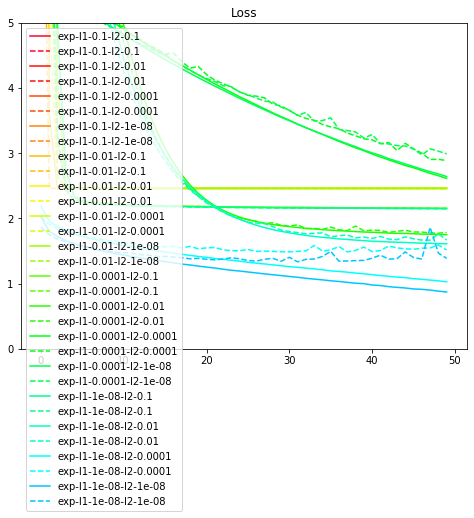

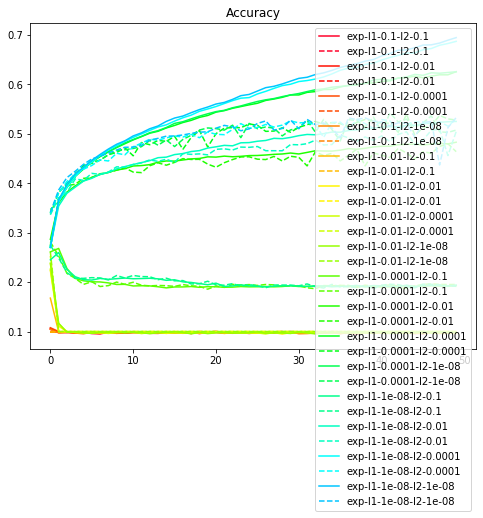

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
"""Code Here
將結果繪出
"""
 
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()